<a href="https://colab.research.google.com/github/dynasty-29/MyKaggleX_ShowcaseProjects/blob/main/carbon_emission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**
This Project provides an in-depth look into the global CO2 emissions at the country-level, allowing for a better understanding of how much each country contributes to the global cumulative human impact on climate. It contains information on total emissions as well as from coal, oil, gas, cement production and flaring, and other sources. We also have a breakdown of per capita CO2 emission per country - showing which countries are leading in pollution levels and identifying potential areas where reduction efforts should be concentrated. 



## **Research Areas:**

1. Using the per capita emissions data, develop a reporting system to track countries' progress in meeting carbon emission targets and give policy recommendations for how countries can reach those targets more quickly.
2. Analyze the correlation between different fossil fuel sources and CO2 emissions to understand how best to reduce CO2 emissions at a country-level.
3. Create an interactive map showing global CO2 levels over time that allows users to visualize trends by country or region across all fossil fuel sources


# **Defining the question**
The main objective of the project is to explore the data set and be able to go through the research areas above..

### **Why?**

Predicting a country's carbon footprint is important in the context of climate change because it helps to identify the primary sources of greenhouse gas emissions, which are the main drivers of climate change. By understanding where emissions are coming from, policymakers and individuals can develop targeted strategies to reduce them. For example, if a country's carbon footprint is primarily the result of transportation emissions, investments in electric vehicles or public transportation infrastructure may be prioritized.

### **Metrics for success**
1. Building a model that can be used as a carbon capture technology to predict level of Per capita CO2 Emission (Best model should have the lowest RMSE).
2. Identifying the top CO2 Emiiter countries.
3. Recording experimental design
4. Determine the main objectives
5. Load and preview the dataset.
6. Understand the data.
7. Prepare the dataset - Identify outliers, anomalies, duplicates, missing values, and determine how deal with them etc.
8. Carry out univariate analysis, bivariate analysis, and modelling.
9. Challenge the solution.
10. Conclusion and recommendations


## **Data Source:**
The data was obtained from [Kaggle](https://www.kaggle.com/datasets/thedevastator/global-fossil-co2-emissions-by-country-2002-2022) and it consist of the following variables:

    Country:	The name of the country. (String)
    ISO 3166-1 alpha-3:	The three-letter code for the country. (String)
    Year:	The year of the data. (Integer)
    Total:	The total amount of CO2 emissions for the country in the given year. (Float)
    Coal:	The amount of CO2 emissions from coal for the country in the given year. (Float)
    Oil:	The amount of CO2 emissions from oil for the country in the given year. (Float)
    Gas:	The amount of CO2 emissions from gas for the country in the given year. (Float)
    Cement:	The amount of CO2 emissions from cement production for the country in the given year. (Float)
    Flaring:	The amount of CO2 emissions from flaring operations for the country in the given year. (Float)
    Other:	The amount of CO2 emissions from other sources for the country in the given year. (Float)
    Per Capita:	The amount of CO2 emissions per capita for the country in the given year. (Float)

# **Data Wrangling and Cleaning**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import missingno as msno
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#loading the data sets
df = pd.read_csv('/content/GCB2022v27_MtCO2_flat.csv') 

In [ ]:
#previewing the data set
df.head(3)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#from preview we have data set dating back in 1750 but most of it have the '[NONE]' value
#will drop all the data before 2002
df1 = df[df['Year'] >= 2002]
df1.head()

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
252,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,NaN,0.063856
253,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,NaN,0.068871
254,Afghanistan,AFG,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.0,NaN,0.052529
255,Afghanistan,AFG,2005,1.889507,0.106256,1.447280,0.329760,0.006211,0.0,NaN,0.077403
256,Afghanistan,AFG,2006,2.159318,0.160944,1.656993,0.329204,0.012177,0.0,NaN,0.084869


In [ ]:
#shape
df1.shape

(4640, 11)

In [ ]:
#data set info
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4640 entries, 252 to 63103
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4640 non-null   object 
 1   ISO 3166-1 alpha-3  4520 non-null   object 
 2   Year                4640 non-null   int64  
 3   Total               4640 non-null   float64
 4   Coal                4400 non-null   float64
 5   Oil                 4420 non-null   float64
 6   Gas                 4400 non-null   float64
 7   Cement              4320 non-null   float64
 8   Flaring             4400 non-null   float64
 9   Other               940 non-null    float64
 10  Per Capita          4620 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 435.0+ KB


In [ ]:
#Checcking for null values
df1.isnull().sum()

Country                  0
ISO 3166-1 alpha-3     120
Year                     0
Total                    0
Coal                   240
Oil                    220
Gas                    240
Cement                 320
Flaring                240
Other                 3700
Per Capita              20
dtype: int64

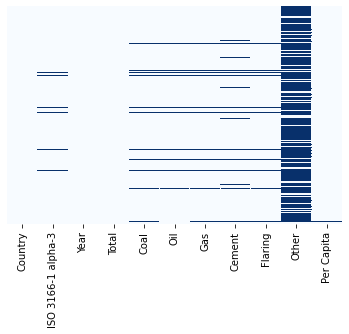

In [ ]:
#visualizing null values
sns.heatmap(df1.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
#We have column 'other' that has more than half of null values
#will drop this column
df2 = df1.drop(['Other'], axis=1)
df2.head(2)

,Country,ISO 3166-1 alpha-3,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
252,Afghanistan,AFG,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,0.063856
253,Afghanistan,AFG,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,0.068871


In [ ]:
#Will now first check the skewness of the data before dealing with nulls
df2.skew()

Year           0.000000
Total         13.480758
Coal          11.901759
Oil           13.515984
Gas           13.800497
Cement        12.314580
Flaring       13.703628
Per Capita     2.874158
dtype: float64

Checking for skewness before filling null values in a dataset is important because it can help determine the appropriate method for handling the missing data. If the dataset is skewed (like in this case), using the mean or median to fill in null values may not be the best approach, as it can lead to inaccuracies and bias in the final analysis. Instead, other methods such as interpolation.

So for this case will apply interpolation. This is a method of estimating missing values in a dataset by using the known values that surround them.

In [ ]:
#dealing with missing values
#wi
df2['Coal'].interpolate(method='linear', inplace=True)
df2['Oil'].interpolate(method='linear', inplace=True)
df2['Gas'].interpolate(method='linear', inplace=True)
df2['Cement'].interpolate(method='linear', inplace=True)
df2['Flaring'].interpolate(method='linear', inplace=True)
df2['Per Capita'].interpolate(method='linear', inplace=True)
df2.isnull().sum()

Country                 0
ISO 3166-1 alpha-3    120
Year                    0
Total                   0
Coal                    0
Oil                     0
Gas                     0
Cement                  0
Flaring                 0
Per Capita              0
dtype: int64

In [ ]:
#Will drop the iso column
df3 = df2.drop(['ISO 3166-1 alpha-3'], axis=1)
df3.head(2)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
252,Afghanistan,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,0.063856
253,Afghanistan,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,0.068871


In [ ]:
#Checcking for duplicates
df3.duplicated().sum()

0

In [ ]:
df3.columns

Index(['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita'],
      dtype='object')

In [ ]:
num = ['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Per Capita']

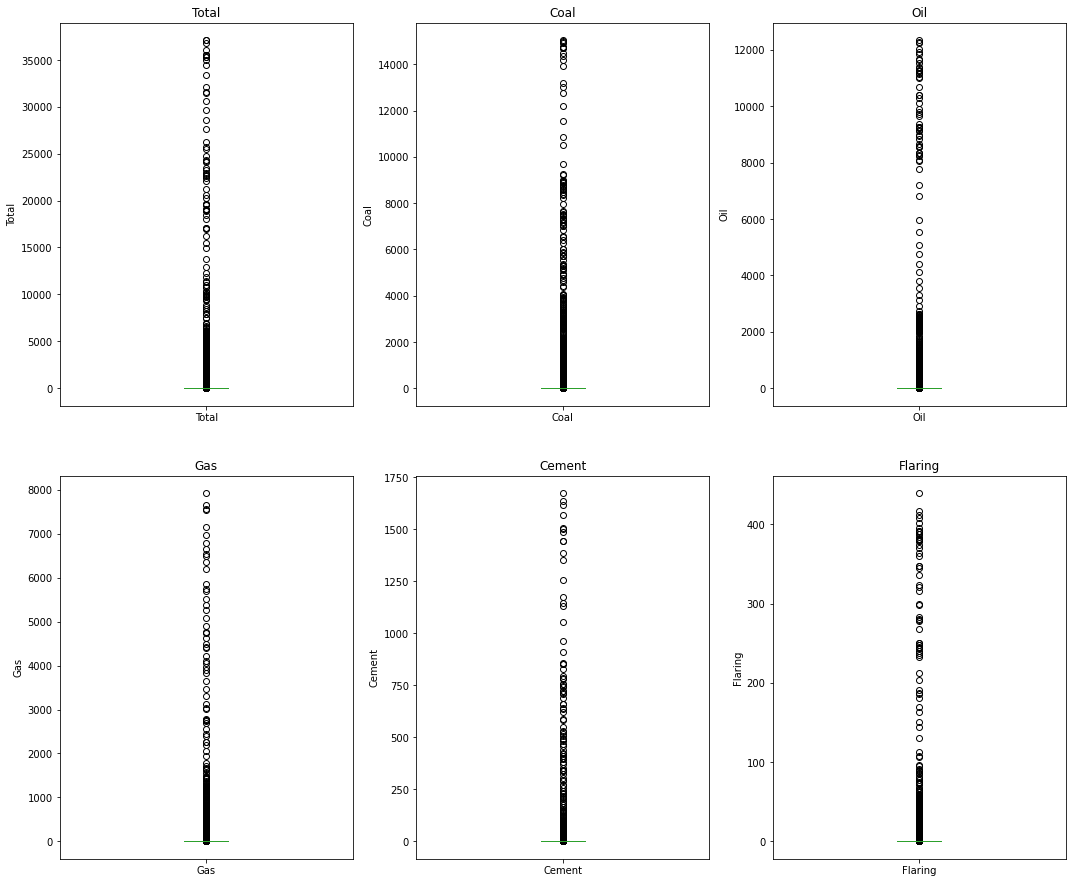

In [ ]:
#Checking for outlier in our numerical columns
def title(x):
  return x.replace('_', ' ')

# Checking for outliers in 

fig,axes = plt.subplots(nrows=2, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  df.boxplot(num[i], grid=False, ax=ax)
  ax.set_title(f"{title(num[i])}")
  ax.set_ylabel(num[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

We have outliers but will not drop them since they give a valid observations that are legitimately different from the rest of the data. They are also an important source of information, Removing them from the dataset can lead to loss of information, which is a crucial thing to consider.

In [ ]:
#checking for anomalies 

for col in num:
  print(col)
  print(df3[col].unique())
  
  
  print('\n')

Total
[1.34099500e+00 1.55960200e+00 1.23724700e+00 ... 3.70825590e+04
 3.52640857e+04 3.71238504e+04]


Coal
[5.51090000e-02 9.18130000e-02 9.16000000e-02 ... 1.47259780e+04
 1.41745640e+04 1.49795981e+04]


Oil
[7.27438000e-01 9.91575000e-01 9.08672000e-01 ... 1.23456534e+04
 1.11918086e+04 1.18371591e+04]


Gas
[5.47416000e-01 4.66408000e-01 2.27168000e-01 ... 7.64752822e+03
 7.55629028e+03 7.92182947e+03]


Cement
[1.10330000e-02 9.80700000e-03 6.21100000e-03 ... 1.61750679e+03
 1.63753753e+03 1.67259237e+03]


Flaring
[0.00000000e+00 2.26000000e-04 1.15810000e-02 ... 4.39253991e+02
 4.07583673e+02 4.16525563e+02]


Per Capita
[0.063856 0.068871 0.052529 ... 4.775633 4.497423 4.693699]




we dont expect negative values inthe above columns


In [ ]:
#saving cleaned data
df3.to_csv('data',index=False)

# **Exploratory Data Analysis**





In [ ]:
#loading our clean data
data = pd.read_csv('/content/data')

In [ ]:
#summary statistics
data.describe()

,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,2011.500000,286.708865,154.523027,104.018050,67.929583,14.800257,3.911044,4.767590
std,5.766903,2292.770550,1092.908099,777.130264,470.759467,105.739662,27.509023,6.240590
min,2002.000000,0.000000,0.000000,0.003664,0.000000,0.000000,0.000000,0.000000
25%,2006.750000,0.682960,0.000000,0.844131,0.000000,0.000000,0.000000,0.615011
50%,2011.500000,6.720607,0.100608,4.374816,0.084902,0.393506,0.000000,2.603312
75%,2016.250000,51.637935,6.720225,25.033364,15.301268,1.964901,0.442864,6.441969
max,2021.000000,37123.850352,15051.512770,12345.653374,7921.829472,1672.592372,439.253991,62.259216


* year run from 2002 to 2021
* 

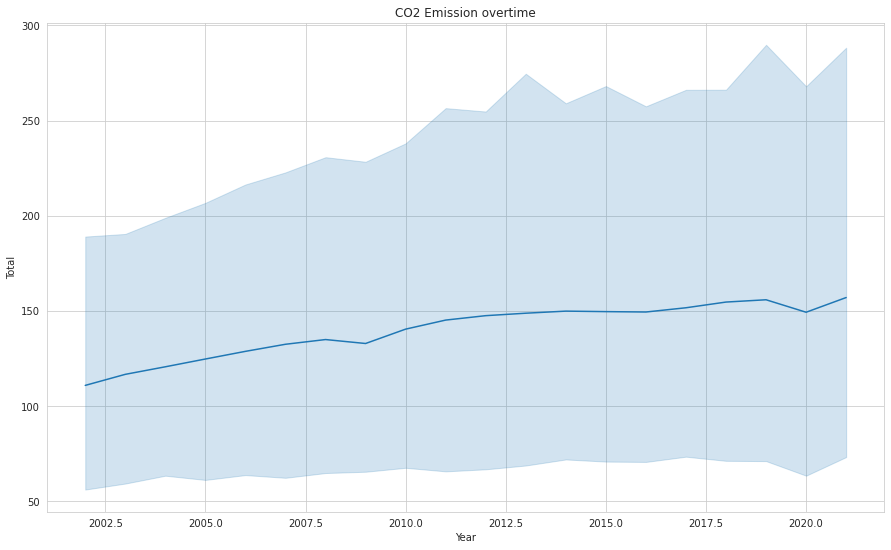

In [ ]:
# Overall CO2 Emission trend
plt.figure(figsize = (15,9))
sns.lineplot(data=data1, x="Year", y="Total")
plt.title("CO2 Emission overtime")
plt.show()

There has been a steady increase in CO2 Emission overtime overall


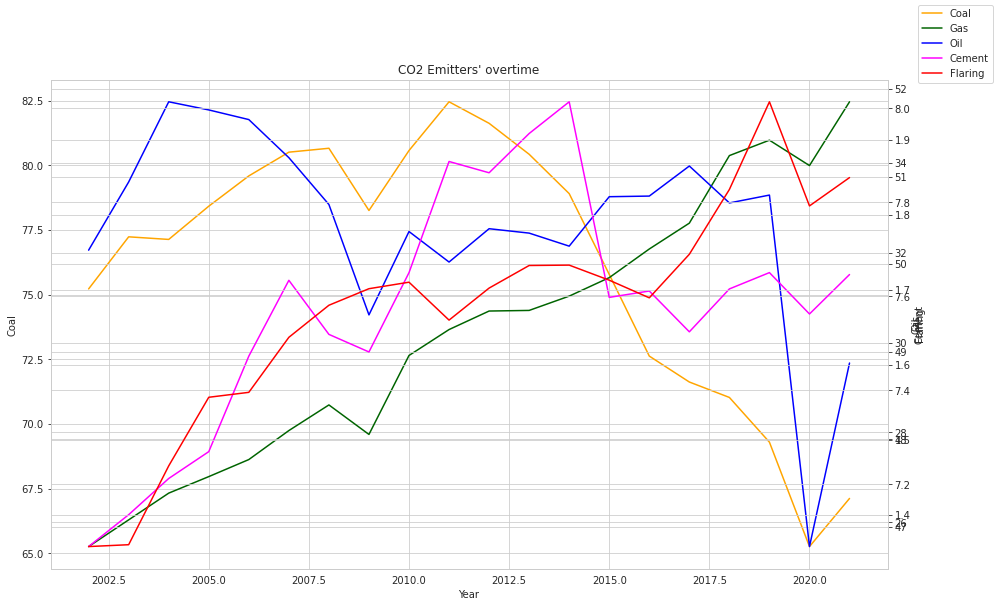

In [ ]:
#examining trends in CO2 Emiiters
plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=data1, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=data1, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=data1, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=data1, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=data1, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("CO2 Emitters' overtime")
plt.show()

There has a been steady increase in CO2 emission from Gas, this is due to increase in gas production over time.
Coal had a steady decrease but a sharp increase comenced in 2020 and has been on the increase ever since.
Oil Co2 emission had a prior decrease due to massive campain of reducing pollution but a steady increase happen from 2020 and has been on the rise ever since.


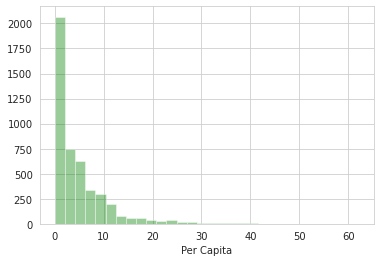

In [ ]:
#per capita distribution
sns.set_style('whitegrid')
sns.distplot(data['Per Capita'], kde = False, color ='green', bins = 30)

In [ ]:
data12 = data.loc[data['Country'] != 'Global']
data1 = data12.loc[data12['Country'] != 'International Transport']

In [ ]:
data1.head(2)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
0,Afghanistan,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,0.063856
1,Afghanistan,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,0.068871


### **Interactive map showing global CO2 Emission levels over time  by country**

In [ ]:
pip install geopandas

In [ ]:
import plotly.express as px
import geopandas as gpd

In [ ]:

# Create a 3D scatter plot
fig = px.scatter_3d(data1, x= "Cement", y="Coal", z="Gas", color="Total", size="Per Capita", size_max=500,
                   hover_name="Country", animation_frame="Year", animation_group="Country",
                   height=600, log_x=True, log_y=True, log_z=True)

# Show the plot
fig.show()

The above 3D map can be used to show trend of Different variables over time

**1. Countries vs their total CO2 Emission**

**a. Highest CO2 Emitters**

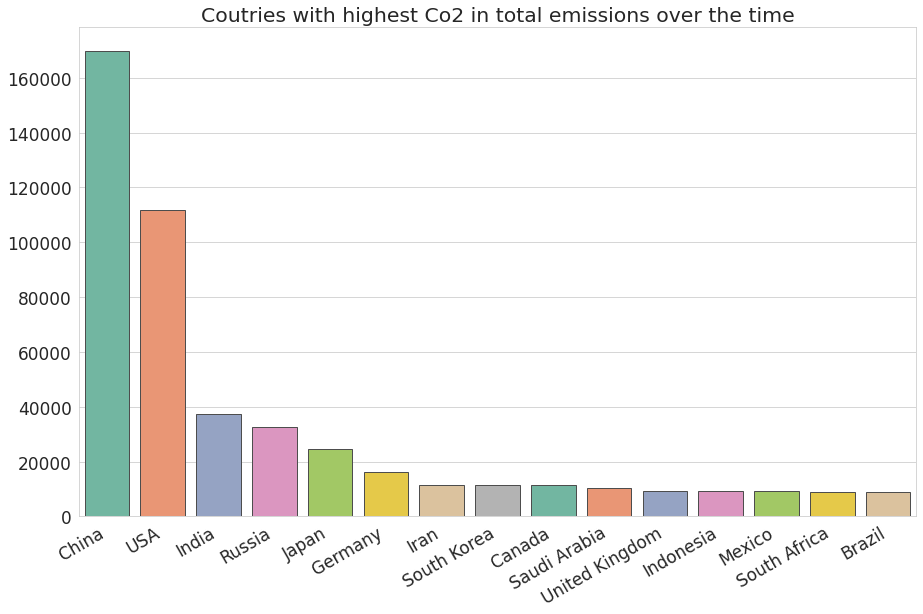

In [ ]:

countries = list(data1.groupby('Country').sum().sort_values(by='Total',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Total', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest Co2 in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dft=data1.groupby(['Country'])['Total'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dft,values='Total',names='Country',title= " Top 10 Countries by Total co2 Emission")
fig3.show()

China produces the highest co2. This is true since alot of manufacturing companies are based there. We also have USA, India, Russia in the top list.

**b. Countries with least CO2 Emission**





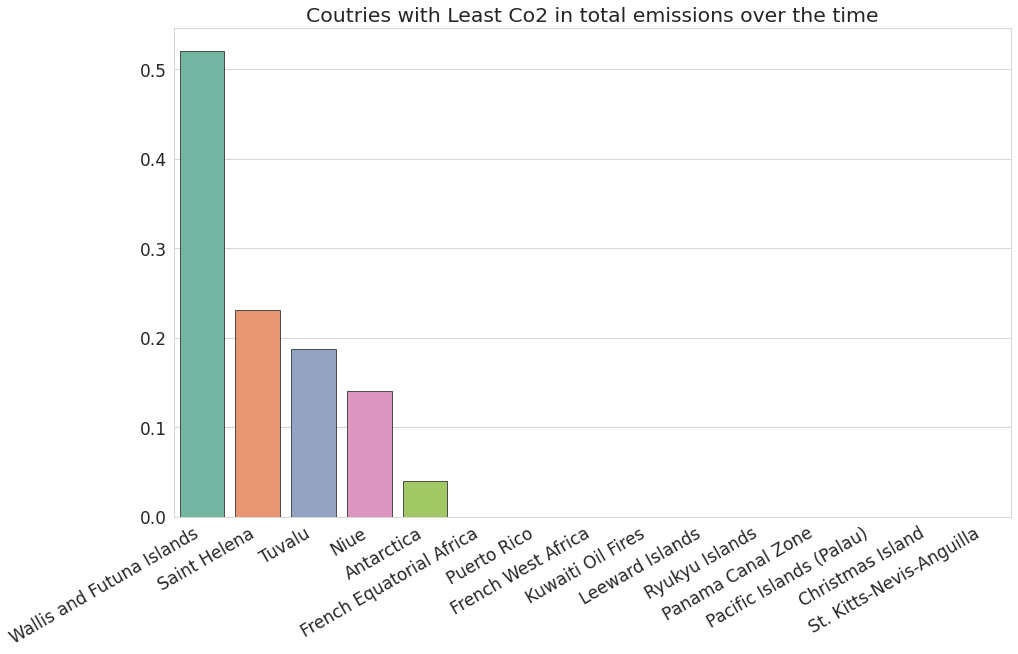

In [ ]:
## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with Least Co2 in total emissions over the time")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**2. Countries with highest CO2 Emission from Oil production**

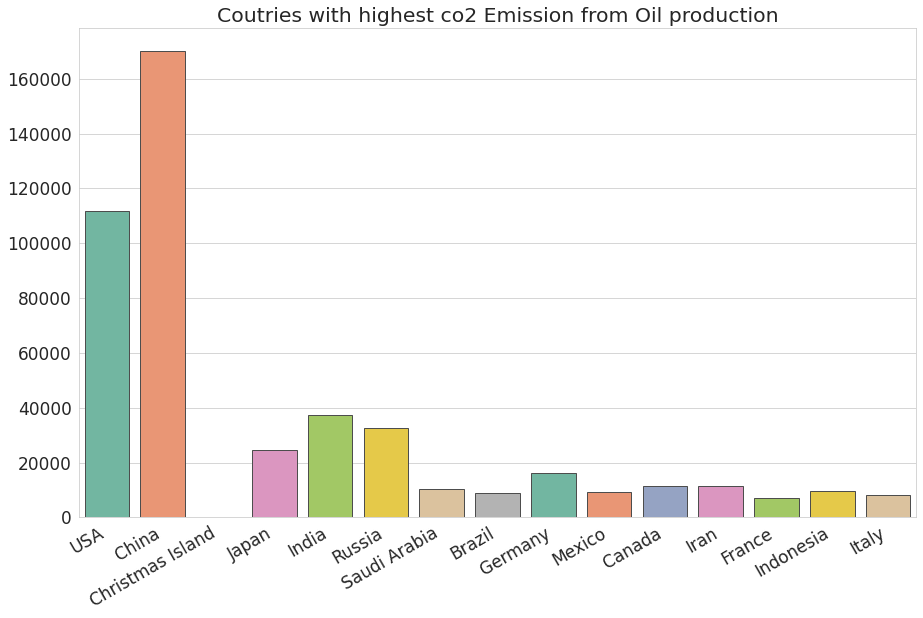

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Oil',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Oil', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Oil production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfo=data1.groupby(['Country'])['Oil'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfo,values='Oil',names='Country',title= " Top 10 Countries by Total co2 Emission from Oil Production")
fig3.show()

**Countries with Least CO2 Emission from Oil production**

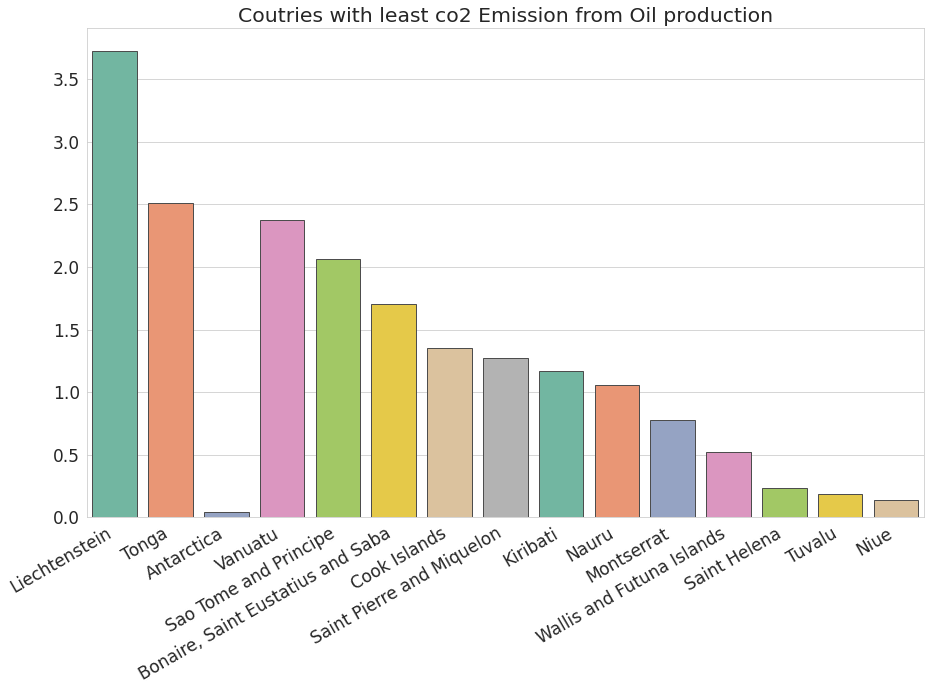

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Oil',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Oil', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Oil production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfo=data1.groupby(['Country'])['Oil'].mean().sort_values(ascending=False)[-10:].reset_index()
fig3= px.pie(dfo,values='Oil',names='Country',title= " Bottom  10 Countries by Total co2 Emission from Oil Production")
fig3.show()

**3. Countries with highest CO2 Emission from Coal Production**

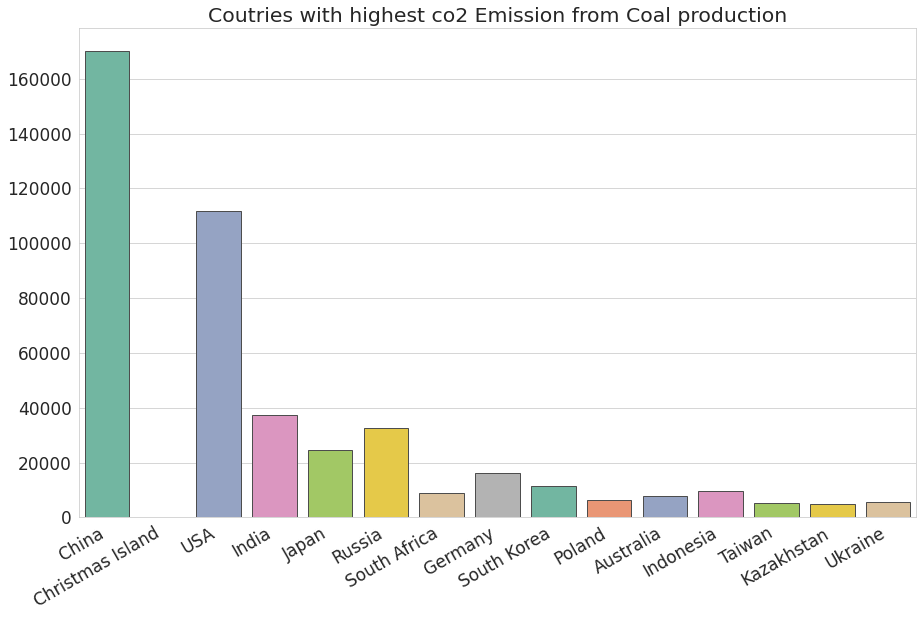

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Coal',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Coal', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Coal production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfc=data1.groupby(['Country'])['Coal'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfc,values='Coal',names='Country',title= " Top 10 Countries by Total co2 Emission from Coal Production")
fig3.show()

**Countries with least CO2 Emission from Coal Production**

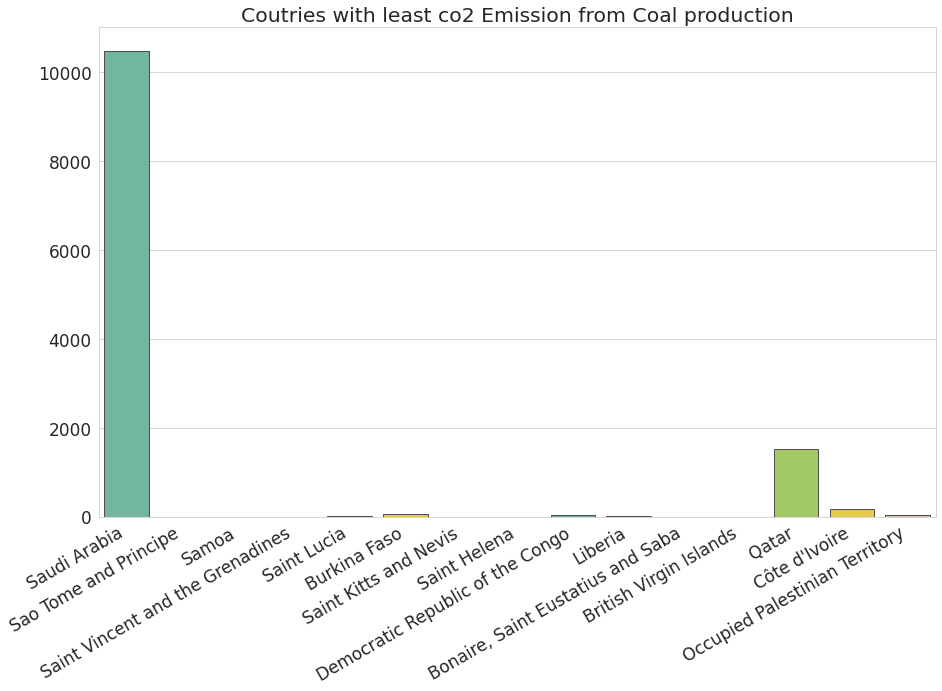

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Coal',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Coal', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Coal production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**4. Countries with highest CO2 Emission for Gas production**

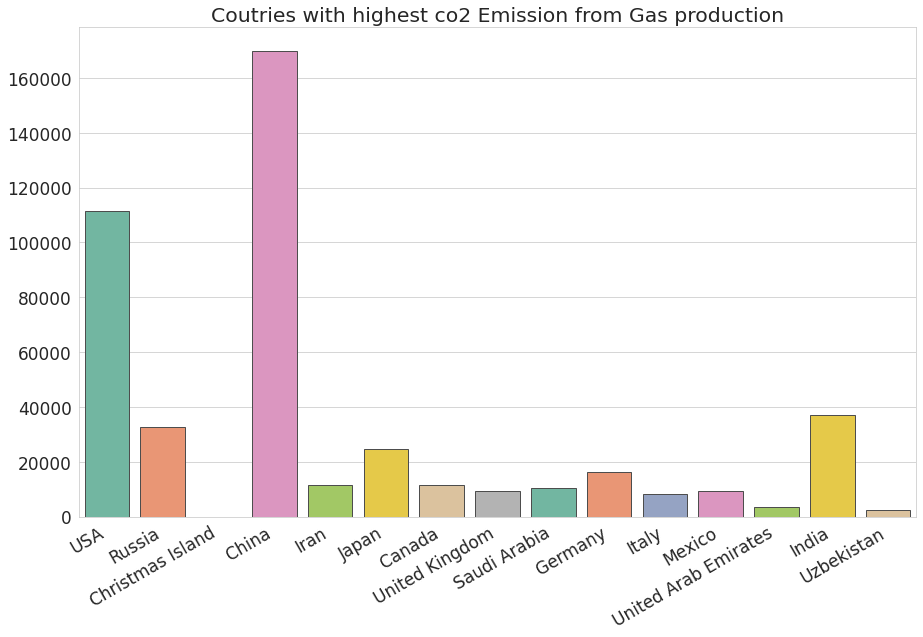

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Gas',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Gas', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 Emission from Gas production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfg=data1.groupby(['Country'])['Gas'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfg,values='Gas',names='Country',title= " Top 10 Countries by Total co2 Emission from Gas Production")
fig3.show()

**Countries with least CO2 Emission from Gas Production**

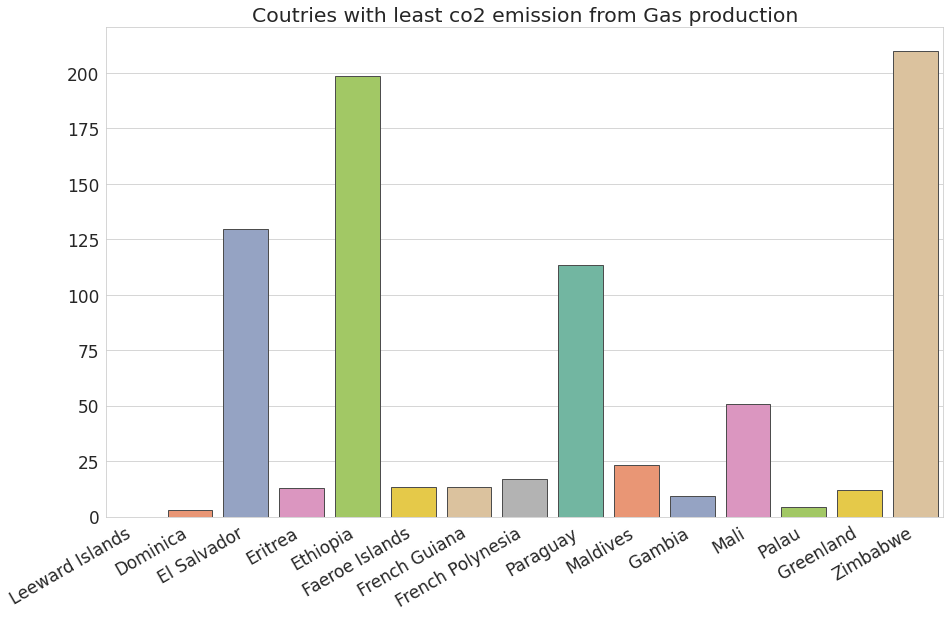

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Gas',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Gas', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 emission from Gas production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**5. Countries with Highest CO2 Emission from Cement Production**

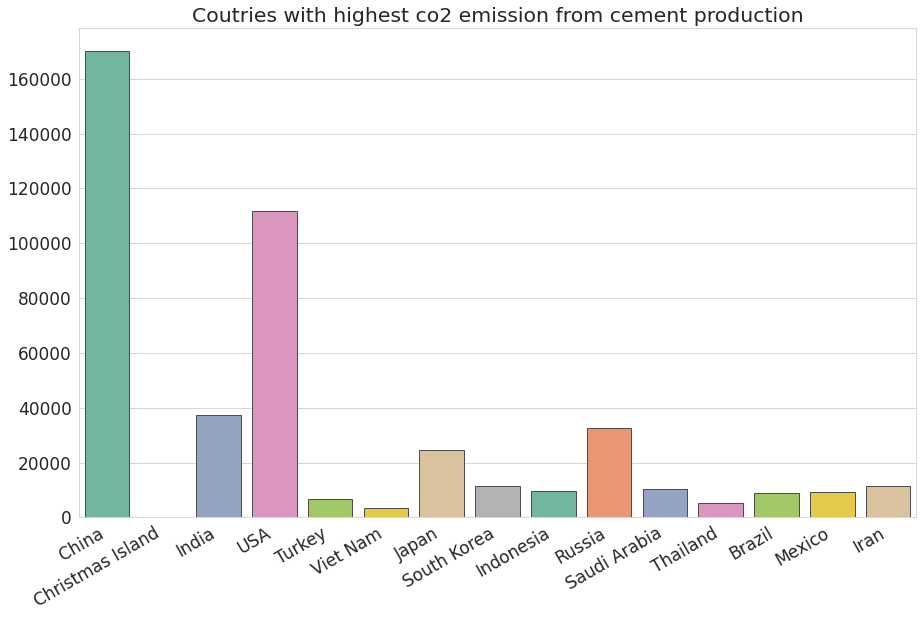

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Cement',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Cement', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 emission from cement production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dfcm=data1.groupby(['Country'])['Cement'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dfcm,values='Cement',names='Country',title= " Top 10 Countries by Total co2 Emission from Cement Production")
fig3.show()

**Countries with Highest CO2 Emission from Cement Production**

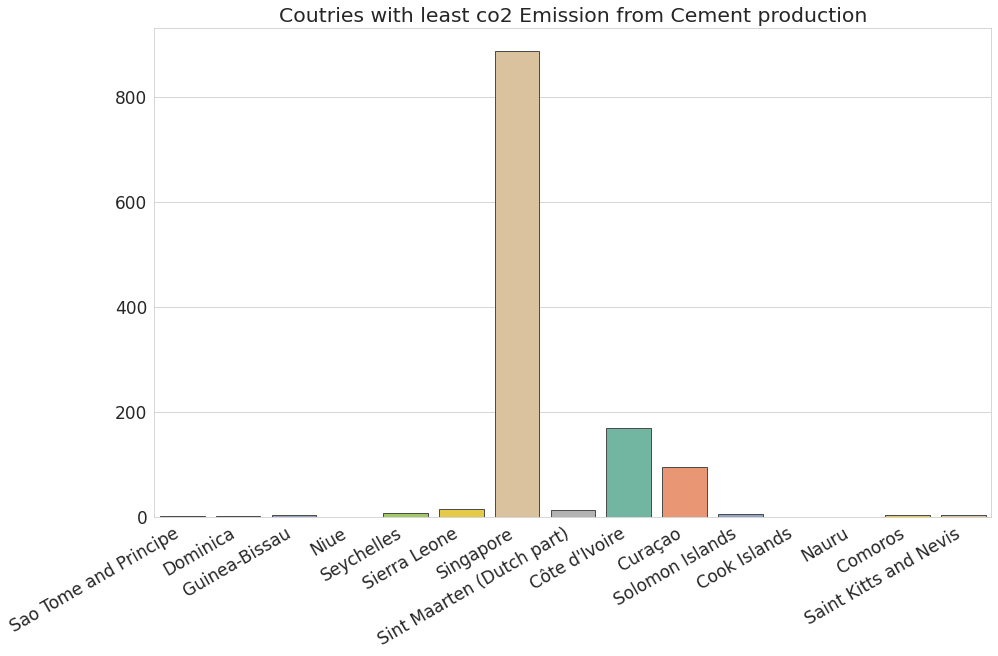

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Cement',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Cement', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with least co2 Emission from Cement production")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

**6. Countries with Highest CO2 Emission from Flaring Operations**

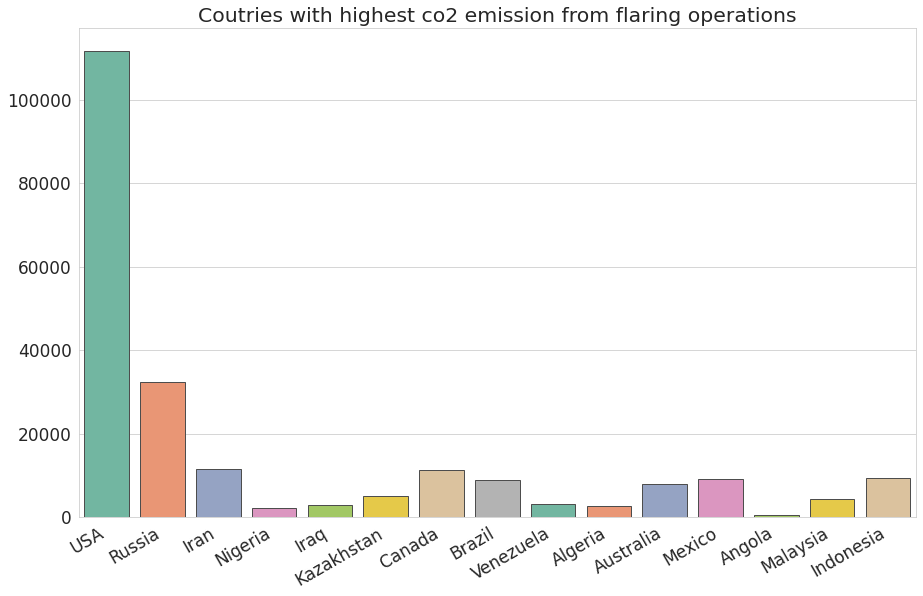

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Flaring',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Flaring', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries with highest co2 emission from flaring operations")
# sns.set_style('darkgrid')
sns.barplot(x=countries[:15], y=values[:15], palette ='Set2', edgecolor ='.3')

In [ ]:
#Visual by percentage
dff=data1.groupby(['Country'])['Flaring'].mean().sort_values(ascending=False)[0:10].reset_index()
fig3= px.pie(dff,values='Flaring',names='Country',title= " Top 10 Countries by Total co2 Emission from Flaring Operations")
fig3.show()

**Countries with Least CO2 Emission from Flaring Operations**

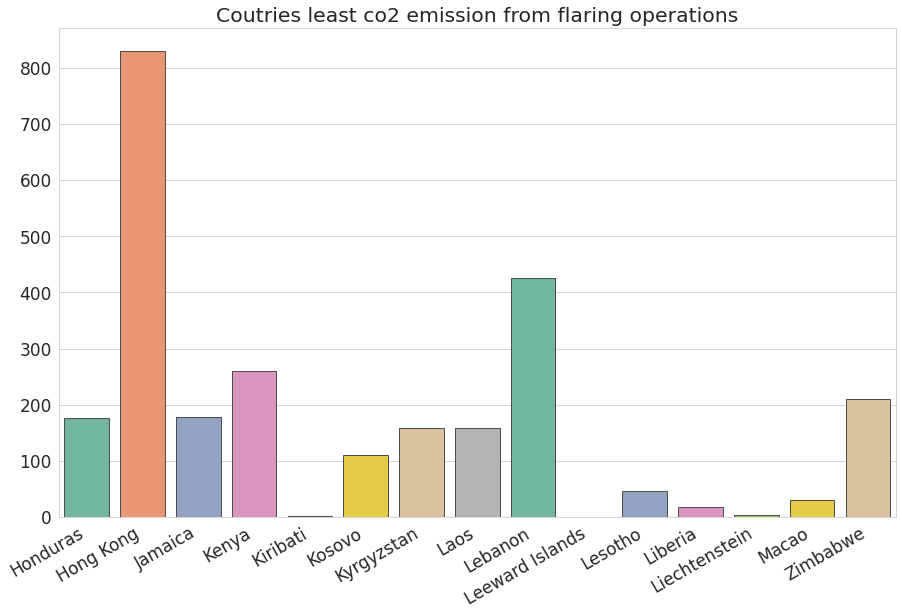

In [ ]:
countries = list(data1.groupby('Country').sum().sort_values(by='Flaring',ascending = False).index)
values = list(data1.groupby('Country').sum().sort_values(by='Flaring', ascending = False)['Total'])




## plot Bargraph
plt.figure(figsize = (15,9))
plt.rcParams['font.size'] = 17.0
plt.xticks(rotation = 30, ha = 'right')
plt.title("Coutries least co2 emission from flaring operations")
# sns.set_style('darkgrid')
sns.barplot(x=countries[-15:], y=values[-15:], palette ='Set2', edgecolor ='.3')

# **Zooming in on Kenya**

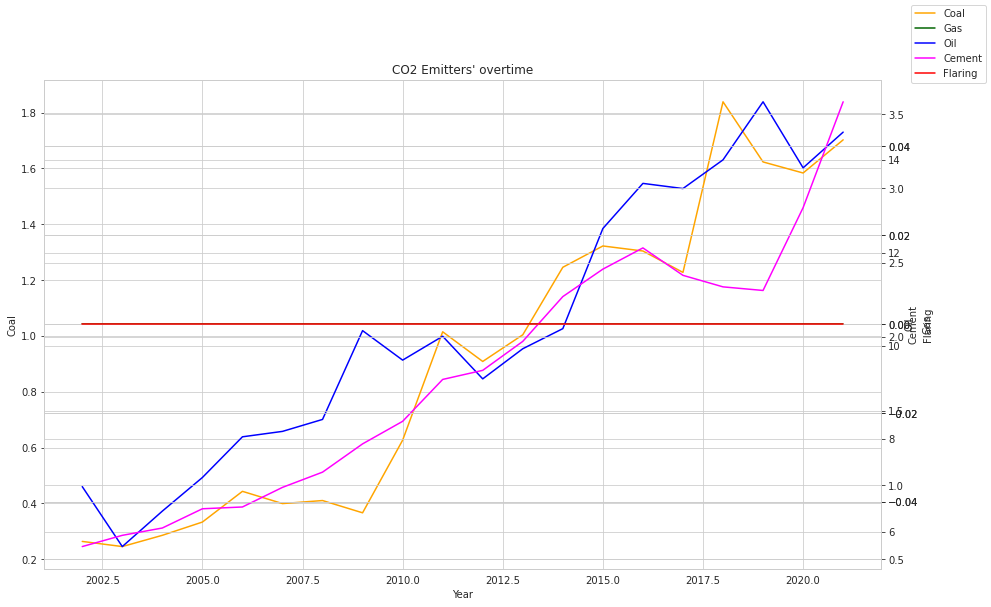

In [ ]:
#examining trend in kenya
dfk = data1[data1['Country'] == "Kenya"]

plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Coal', data=dfk, ci= None, color='orange', legend=False, label = 'Coal' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

ax3 = line1.twinx()
line3 = sns.lineplot(x='Year', y='Oil', data=dfk, ci= None, color='Blue',ax=ax3, legend=False, label = 'Oil')

ax4 = line1.twinx()
line4 = sns.lineplot(x='Year', y='Cement', data=dfk, ci= None, color='Magenta',ax=ax4, legend=False, label = 'Cement')

ax5 = line1.twinx()
line5 = sns.lineplot(x='Year', y='Flaring', data=dfk, ci= None, color='red',ax=ax5, legend=False, label = 'Flaring')

line1.figure.legend()

plt.title("CO2 Emitters' overtime")
plt.show()

Kenya has a lot pf cement processing plant hence the steady increase in CO2 Emission from cement production.

The country is also a big exporter of crude oil, where it does the processing on it's own hence the steady increase in CO2 Emission from Oil production. 

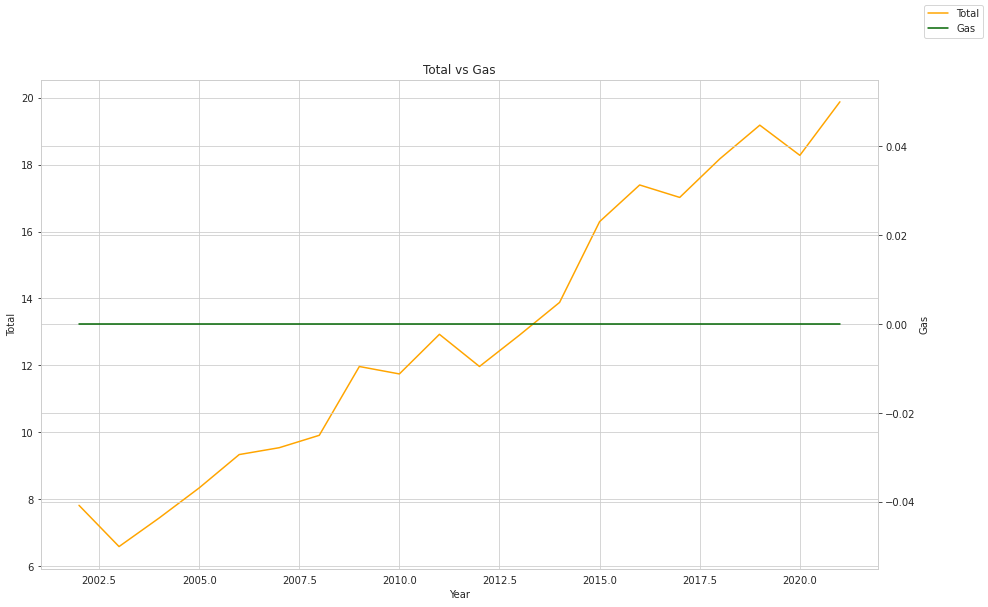

In [ ]:
plt.figure(figsize=(15,9))

line1 = sns.lineplot(x='Year', y='Total', data=dfk, ci= None, color='orange', legend=False, label = 'Total' )

ax2 = line1.twinx()
line2 = sns.lineplot(x='Year', y='Gas', data=dfk, ci= None, color='darkgreen',ax=ax2, legend=False, label = 'Gas')

line1.figure.legend()

plt.title("Total vs Gas")
plt.show()

Overall Kenya has a increase in the total amount of CO2 Emission meaning it hasn't really picked up on Bio measure to cab this crisis to help in climate change.

It's also a big producer of gas however most of the gas produced use decarbonization pathways

In [ ]:
df3.head()

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Per Capita
252,Afghanistan,2002,1.340995,0.055109,0.727438,0.547416,0.011033,0.0,0.063856
253,Afghanistan,2003,1.559602,0.091813,0.991575,0.466408,0.009807,0.0,0.068871
254,Afghanistan,2004,1.237247,0.091600,0.908672,0.227168,0.009807,0.0,0.052529
255,Afghanistan,2005,1.889507,0.106256,1.447280,0.329760,0.006211,0.0,0.077403
256,Afghanistan,2006,2.159318,0.160944,1.656993,0.329204,0.012177,0.0,0.084869


# **Checking for correlation**

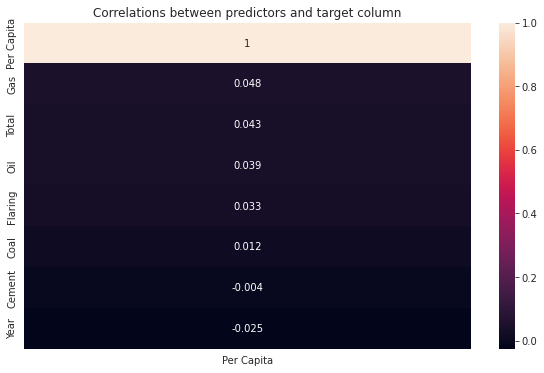

In [ ]:
#highlighting correlations specifically with target
corr = df3.corr()
target_col=corr[['Per Capita']].sort_values(by='Per Capita', ascending=False)

plt.figure(figsize=(10,6))

sns.heatmap(target_col,annot=True)
plt.title("Correlations between predictors and target column")
plt.show()

Gas Production is the highest producers of CO2, Followed by OIl, Flaring operations, Coal and Cement has the least.

# **Modelling**

In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [ ]:

#dropping unnecessary columns

df3.drop(columns=['Year', 'Country'], inplace=True, axis=1)

#printing variables that will be used in modelling
print(df3.columns)

Index(['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring', 'Per Capita'], dtype='object')


In [ ]:
#separating features and target for use in modelling

X = df3.drop(['Per Capita'], axis=1)

y = df3['Per Capita']

In [ ]:

# Splitting dataset to train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=0)

In [ ]:

#list with feature names
x_cols = X.columns
x_cols

Index(['Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring'], dtype='object')

In [ ]:
#scaled features
#transforming test based on values obtained from train (scaler should only be 
# fitted on train set then used to transform both train and test to prevent 
# data leakage caused by fitting on entire dataset)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [ ]:

#highlighting the mean and range in the target column
print("mean: ", y.mean())
print("range: ", (y.max() - y.min()))

mean:  4.767590315948276
range:  62.259216


In [ ]:
#list that will track rmses
rmses = []

# **Linear regression**
Baseline model

In [ ]:

#using scaled features 

#fitting linear model
regression = LinearRegression()
regression.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = regression.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append((f'Baseline linear model RMSE: {rmse}'))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
     

Mean Squared Error: 41.530567773558154
Root Mean Squared Error: 6.444421445991731


In [ ]:
rmses

['Baseline linear model RMSE: 6.444421445991731']

**Checking for homoscedasticity**

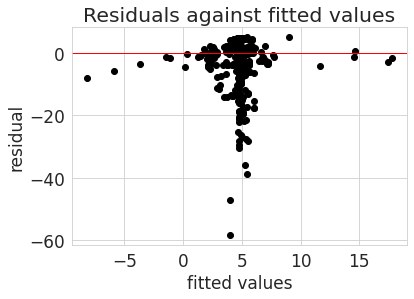

In [ ]:

# Creating the residuals by substracting the test value from the predicted 
# value for each row in the test dataset

residuals = np.subtract(y_pred, y_test)


#plotting residuals
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.title('Residuals against fitted values')
plt.show()
     

In [ ]:
#assessing heteroscedasticity using Barlett's test

test_result, p_value = sp.stats.bartlett(y_pred, residuals)


# If the pvalue is less than the significance level of 0.05, then the null
# hypothesis is rejected - the variance is different for at least one pair of datapoints

# Otherwise the null hypothesis that 
# the variance is homogeneous across the data

#using significance level of 0.05:
if (p_value < 0.05 ):
  print('the variances are not homogenous')
else:
  print('the variances are homogeneous across the data')

the variances are not homogenous


**Checking if residuals are normally distributed**

In [ ]:

# importing the shapiro function
from scipy.stats import shapiro 


# testing for normality. extracting statistic and p value
stat, p = shapiro(residuals)


# interpreting
alpha = 0.05
if p > alpha:
	print('Sample appears to have a normal distribution')
else:
	print('Sample does not appear to have a normal distribution')

Sample does not appear to have a normal distribution


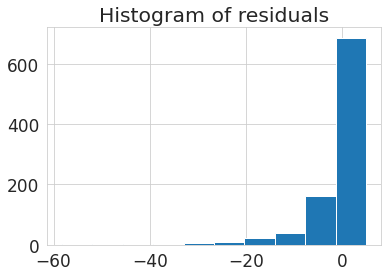


Skew of residuals: -3.123779091939244


In [ ]:

#plotting histogram of residuals
plt.hist(residuals, bins= 10)
plt.title("Histogram of residuals")
plt.show()

print(f'\nSkew of residuals: {residuals.skew()}')

 **Multicollinearity check**

In [ ]:
#checking for multicollinearity 
#creating function that will calculate the VIF for each feature
def vif(df, features):
  vif, tolerance = {}, {}
  for feature in features:
    #extract other features other than the one chosen as y into a list
    X = [f for f in features if f!=feature]
    X, y = df[X], df[feature]
    #extract r2
    r2 = LinearRegression().fit(X, y).score(X, y)
    #calculate tolerance
    tolerance[feature] = 1-r2
    #calculate VIF
    vif[feature] = 1/tolerance[feature]
  return pd.DataFrame({'VIF': vif, 'Tolerance': tolerance})

In [ ]:

#checking multicollinearity
vif(df3, df3.drop('Per Capita', axis=1).columns)

,VIF,Tolerance
Total,34.020725,0.029394
Coal,66.251164,0.015094
Oil,44.316855,0.022565
Gas,53.761571,0.018601
Cement,56.237378,0.017782
Flaring,35.635398,0.028062


# **Lasso regression**
Introduces penalty (on sum of absolute values of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

It can be used in feature selection because it can shrink the value of a coefficient to zero, but a drawback in cases of multicollinearity is that since it randomly selects which variable to prioritise, it may drop a column considered more useful for interpretation .

In [ ]:

#finding best hyperparameter (penalty) value for lasso
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
lasso = Lasso()
#finding alpha value
search = GridSearchCV(estimator=lasso,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.001}


In [ ]:
#using scaled features 

#fitting lasso model 
lasso = Lasso(alpha=0.001)
lasso.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = lasso.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append([f'Tuned lasso model RMSE: {rmse}'])


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 41.524012965807124
Root Mean Squared Error: 6.443912861438082


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']


# **Ridge Regression**
Introduces penalty (on sum of squares of the coefficients) that shrinks coefficients and introduces more bias in the model in order to reduce the variance of the model (helps in addressing the issue of overfitting).

Unlike Lasso, it cant shrink the value of a coefficient to zero to completely eliminate features. It gives features with multicollinearity similar coefficients.

In [ ]:
#ridge regression
#finding best alpha value. 
parameters = {'alpha': np.concatenate(([0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1)))}
ridge = Ridge(random_state=0)
#finding alpha value
search = GridSearchCV(estimator=ridge,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)
     

{'alpha': 1.1}


In [ ]:
#using scaled features 

#fitting ridge model 
ridge = Ridge(alpha=1.1)
ridge.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = ridge.predict(X_test_sc)

#evaluating model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Tuned ridge model RMSE: {rmse}')

Mean Squared Error: 41.521946405557756
Root Mean Squared Error: 6.443752509645118


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118


# **Elastic Net Regression**
It is a hybrid version of lasso and ridge regression. It applies a penalty to the sum of absoulte values of coefficients as well as to the sum of squares of coefficients.

In [ ]:
#finding best hyperparameter values - alpha and l1_ratio
elastic=ElasticNet()
parameters = {'alpha': np.concatenate(([0.0001,0.001,0.01], np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 20, 1))),
              'l1_ratio':[.2,.4,.6,.8,1]}

search=GridSearchCV(estimator=elastic,param_grid=parameters,scoring='neg_mean_squared_error')

search.fit(X_train_sc,y_train)
print(search.best_params_)

{'alpha': 0.001, 'l1_ratio': 0.8}


In [ ]:
#using scaled features 

#fitting model
elastic=ElasticNet(alpha=0.001,l1_ratio=0.8)
elastic.fit(X_train_sc,y_train)

#predicting on unseen data
y_pred = elastic.predict(X_test_sc)

#evaluating model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

rmses.append(f'Tuned elastic net model RMSE: {rmse}')

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 41.52012159509772
Root Mean Squared Error: 6.443610912764497


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497


**Comparing coefficients**

In [ ]:

#creating dataframe with coefficients and rank of coefficients' absolute values
df_coef = pd.DataFrame(regression.coef_, columns=['linear'], index=x_cols)
df_coef['linear rank'] = df_coef['linear'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['lasso'] = lasso.coef_
df_coef['lasso rank'] = df_coef['lasso'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['ridge'] = ridge.coef_
df_coef['ridge rank'] = df_coef['ridge'].apply(lambda x: abs(x)).rank(ascending=False)
df_coef['elastic'] = elastic.coef_
df_coef['elastic rank'] = df_coef['elastic'].apply(lambda x: abs(x)).rank(ascending=False)


df_coef.sort_values(by=['linear rank'])

,linear,linear rank,lasso,lasso rank,ridge,ridge rank,elastic,elastic rank
Gas,6.404515,1.0,6.287548,1.0,6.226607,1.0,6.192817,1.0
Cement,-5.825602,2.0,-5.689215,2.0,-5.639265,2.0,-5.590125,2.0
Flaring,-4.597532,3.0,-4.511896,3.0,-4.463077,3.0,-4.439654,3.0
Coal,3.933513,4.0,3.814305,4.0,3.772708,4.0,3.728711,4.0
Total,3.717294,5.0,3.617938,5.0,3.597429,5.0,3.557064,5.0
Oil,-3.603209,6.0,-3.486897,6.0,-3.461123,6.0,-3.414704,6.0


# **KNN**

In [ ]:

# Training and Predictions

#initial arbitrary value of 5
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn model 1 RMSE: {rmse}')


Mean Squared Error: 11.965051478710487
Root Mean Squared Error: 3.4590535524490638


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638


In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_neighbors': np.arange(3, 15, 2),
              'metric': ['minkowski', 'euclidean','manhattan']}

knnr = KNeighborsRegressor()
#finding values
search = GridSearchCV(estimator=knnr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)
     

{'metric': 'manhattan', 'n_neighbors': 3}


In [ ]:
# Training and Predictions
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3, metric='manhattan')
knn.fit(X_train_sc, y_train)

y_pred = knn.predict(X_test_sc)

#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Knn further tuned model RMSE: {rmse}')

Mean Squared Error: 9.35723993593296
Root Mean Squared Error: 3.05896059731618


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638

Knn further tuned model RMSE: 3.05896059731618


# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
#Fitting the model


forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 20, max_depth=5)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Random forest model 1 RMSE: {rmse}')

Mean Squared Error: 18.578157209629047
Root Mean Squared Error: 4.310238648802296


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638

Knn further tuned model RMSE: 3.05896059731618

Random forest model 1 RMSE: 4.310238648802296


In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(50, 500, 50),
              'min_samples_split': np.arange(5, 30, 5),
              'max_depth': np.arange(2,7)}
rforest = RandomForestRegressor(random_state=0)
#finding values
search = GridSearchCV(estimator=rforest,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train,y_train)
print(search.best_params_)

{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 100}


In [ ]:
#Fitting the model

forest = RandomForestRegressor(n_estimators = 100, random_state=0, min_samples_split = 5, max_depth=6)
forest.fit(X_train, y_train)

# predicting
y_pred = forest.predict(X_test)


#evaluating the model

mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Rforest further tuned model RMSE: {rmse}')

Mean Squared Error: 15.112175332734386
Root Mean Squared Error: 3.887438145197218


In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638

Knn further tuned model RMSE: 3.05896059731618

Random forest model 1 RMSE: 4.310238648802296

Rforest further tuned model RMSE: 3.887438145197218


# **Gradient boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:

#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.01, max_depth=5, random_state=0)
gbr.fit(X_train_sc, y_train)

# Predict
y_pred = gbr.predict(X_test_sc)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gradient boosting model 1 RMSE: {rmse}')

Mean Squared Error: 21.796635570592603
Root Mean Squared Error: 4.668686707264968


In [ ]:

for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638

Knn further tuned model RMSE: 3.05896059731618

Random forest model 1 RMSE: 4.310238648802296

Rforest further tuned model RMSE: 3.887438145197218

Gradient boosting model 1 RMSE: 4.668686707264968


In [ ]:
#using grid search to tune hyperparameters
#finding best parameter values from range below
parameters = {'n_estimators': np.arange(100, 500, 100),
              'learning_rate': [0.01, 0.1, 1],
              'max_depth': np.arange(2,7)}
gdbr = GradientBoostingRegressor(random_state=0)

#finding values
search = GridSearchCV(estimator=gdbr,param_grid=parameters,scoring='neg_mean_squared_error')
search.fit(X_train_sc,y_train)
print(search.best_params_)

{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}


In [ ]:
#Fitting the model

gbr = GradientBoostingRegressor(n_estimators=300, learning_rate=0.1, max_depth=5, random_state=0)
gbr.fit(X_train_sc, y_train)

# Predict 
y_pred = gbr.predict(X_test_sc)


#evaluating the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))


print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)

rmses.append(f'Gboosting further tuned model RMSE: {rmse}')

In [ ]:
for x in rmses:
  print(f'\n{x}')


Baseline linear model RMSE: 6.444421445991731

['Tuned lasso model RMSE: 6.443912861438082']

Tuned ridge model RMSE: 6.443752509645118

Tuned elastic net model RMSE: 6.443610912764497

Knn model 1 RMSE: 3.4590535524490638

Knn further tuned model RMSE: 3.05896059731618

Random forest model 1 RMSE: 4.310238648802296

Rforest further tuned model RMSE: 3.887438145197218

Gradient boosting model 1 RMSE: 4.668686707264968

Gboosting further tuned model RMSE: 3.2602255166495904


The best model so far if KNN with the lowest RMSE


In [ ]:

# saving the model

import pickle
file = open('carbonemissionmodel.pkl','wb')
pickle.dump(knn,file)
file.close()

# **Conclusion**


1.   Gas Production is the highest producers of CO2, Followed by OIl, Flaring operations, Coal and Cement has the least.

2.   There has been an overall steady increase in CO2 Emission overtime.

3. Biggest contributers of Co2 Emission are China, USA, India, Russia and Japan. 

4. From the data the best model to create a carbon capture technology is KNN since it had the lowest RMSE of 3.05. 



# **Recommendations**
1. Reduce energy consumption: Decreasing energy consumption can help lower carbon emissions. This can be done by improving energy efficiency, such as using energy-efficient appliances and LED light bulbs.

2. Switch to renewable energy: Renewable energy sources such as wind, solar, and hydropower do not produce greenhouse gas emissions, making them a clean alternative to fossil fuels. Governments can incentivize the use of renewable energy sources and phase out the use of fossil fuels.

3. Implement carbon taxes: This is a market-based mechanism that can provide an incentive for individuals and businesses to reduce their carbon emissions.

4. Plant trees: Trees absorb carbon dioxide through photosynthesis, making afforestation and reforestation initiatives an effective way to reduce atmospheric carbon levels.

5. Encourage sustainable agriculture: Sustainable agriculture practices can reduce carbon emissions by decreasing the use of synthetic fertilizers and improving soil health.

6. Promote public transportation: Encouraging the use of public transportation can reduce the number of cars on the road, which in turn reduces carbon emissions.

7. Use carbon capture technology: Carbon capture technology can remove carbon dioxide from the atmosphere and store it underground.
